# The Imports

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import MODEL, display_grids

from datetime import datetime

import xarray as xr
from metpy.io import GempakGrid
from metpy.units import units
from metpy.plots import ContourPlot, FilledContourPlot, BarbPlot, MapPanel, PanelContainer

# Get the Data

In [2]:
gem_file_name = MODEL + 'nam/24091712_nam211.gem'
gem_file = GempakGrid(gem_file_name)

As always, when looking at data for the first time, it is a good idea to see just what it looks like.

In [3]:
list_of_grids = gem_file.gdinfo()
display_grids(list_of_grids)

 NUM         DATTIM1              DATTIM2          LEVEL1 LEVEL2  COORD PARM
----------------------------------------------------------------------------
    0  2024-09-17 12:00:00                            350         PRES  HGHT
    1  2024-09-17 12:00:00                            300         PRES  TMPK
    2  2024-09-17 12:00:00                            600         PRES  TMPK
    3  2024-09-17 12:00:00                             30      0  PDLY  VREL
    4  2024-09-17 12:00:00                            800         PRES  OMEG
    5  2024-09-17 12:00:00                            650         PRES  VREL
    6  2024-09-17 12:00:00                            200         PRES  UREL
    7  2024-09-17 12:00:00                            550         PRES  HGHT
    8  2024-09-17 12:00:00                            750         PRES  TMPK
    9  2024-09-17 12:00:00                            700         PRES  OMEG
   10  2024-09-17 12:00:00                              0         NONE  CINS

Now we get down to the business of picking out the data we want. What's the time, what level in the atmosphere, what is the parameter called, etc. Because `gdxarray` always returns a list, we use `[0]` to grab the first (and only, at least for this request!) item from the list.

In [4]:
plot_time = datetime(2024, 9, 18, 12)
ht500 = gem_file.gdxarray(parameter='HGHT', date_time=plot_time, level=500)[0]
ht500

<xarray.DataArray 'z' (time: 1, pres: 1, y: 65, x: 93)>
array([[[[5871.9062, 5872.354 , 5873.954 , ..., 5892.0503, 5891.698 ,
          5890.4663],
         [5874.082 , 5874.178 , 5874.914 , ..., 5893.89  , 5893.186 ,
          5891.682 ],
         [5876.306 , 5876.178 , 5876.642 , ..., 5895.474 , 5894.722 ,
          5893.49  ],
         ...,
         [5650.354 , 5641.65  , 5633.49  , ..., 5549.49  , 5552.498 ,
          5554.306 ],
         [5612.8022, 5603.89  , 5596.1143, ..., 5548.21  , 5551.97  ,
          5552.93  ],
         [5575.826 , 5565.25  , 5556.77  , ..., 5547.65  , 5549.346 ,
          5550.146 ]]]], dtype=float32)
Coordinates:
    metpy_crs  object Projection: lambert_conformal_conic
    latitude   (y, x) float64 12.19 12.39 12.58 12.77 ... 57.68 57.49 57.29
    longitude  (y, x) float64 -133.5 -132.8 -132.1 ... -51.51 -50.44 -49.38
  * x          (x) float32 -4.226e+06 -4.145e+06 ... 3.17e+06 3.251e+06
  * y          (y) float32 2.035e+06 2.117e+06 2.198e+06 ... 7.155e+06 7.237e+06
  * time       (time) datetime64[ns] 2024-09-18T12:00:00
  * pres       (pres) int64 500
Attributes:
    gempak_grid_type:  forecast

MetPy can do a lot of automatic unit conversions, but the GEMPAK data comes in without units. Let's fix that.

In [5]:
ht500 = ht500 * units('m')
ht500

Magnitude,[[[[5871.90625 5872.35400390625 5873.9541015625 ... 5892.05029296875 5891.6982421875 5890.46630859375] [5874.08203125 5874.17822265625 5874.9140625 ... 5893.89013671875 5893.18603515625 5891.68212890625] [5876.30615234375 5876.17822265625 5876.64208984375 ... 5895.47412109375 5894.72216796875 5893.490234375] ... [5650.35400390625 5641.64990234375 5633.490234375 ... 5549.490234375 5552.498046875 5554.30615234375] [5612.80224609375 5603.89013671875 5596.1142578125 ... 5548.2099609375 5551.97021484375 5552.93017578125] [5575.826171875 5565.25 5556.77001953125 ... 5547.64990234375 5549.34619140625 5550.14599609375]]]]
Units,meter


# Calculate Something
In this case, we are just plotting the data as is (aside from unit conversions), so no calculations yet.

# Plot It
## What are we plotting?

We can use `help(ContourPlot)` to learn about the attributes that can be specified in the next cell. Notice that we are requesting an automatic unit conversion here.

In [6]:
cp = ContourPlot()
cp.data = ht500.isel(x=range(20,80))
cp.time = plot_time
cp.contours = range(0, 700, 6)
cp.linecolor = 'mediumvioletred'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

## Where are we plotting?

In [7]:
panel = MapPanel()
panel.area = [-120, -74, 22, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights at {plot_time}'
panel.plots = [cp]

## Display the Plot

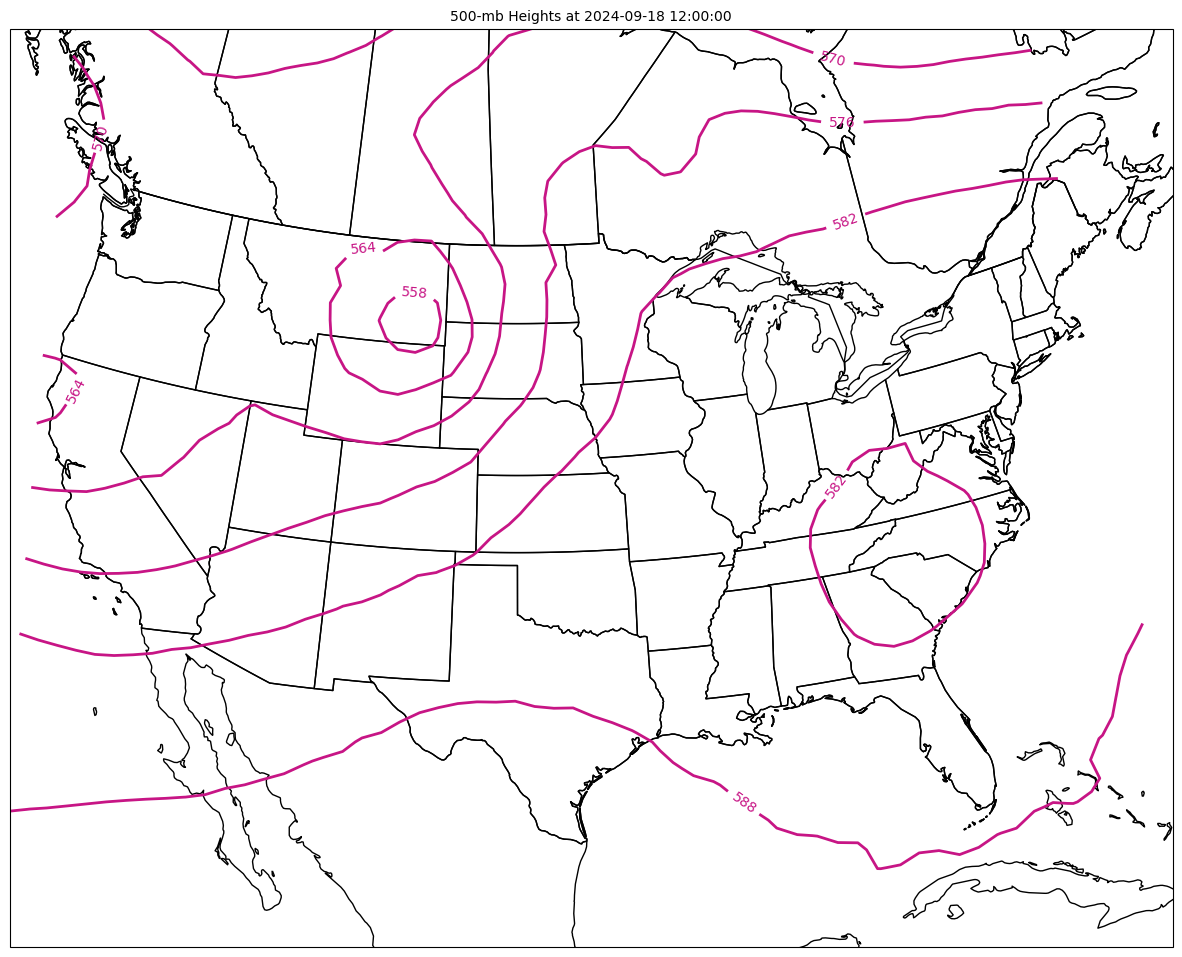

In [8]:
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()

# Example 2: Filled Contours
Now we will show an example of plotting filled contours, using the 500-mb temperature. This example also shows how we can overlay additional contours on top.

In [9]:
t500 = gem_file.gdxarray(parameter='TMPK', date_time=plot_time, level=500)[0]

In [10]:
t500 = t500 * units('degK')

In [11]:
fill = FilledContourPlot()
fill.data = t500
fill.time = plot_time
fill.contours = range(-20, 10, 5)
fill.colormap = 'twilight'
fill.colorbar = 'horizontal'
fill.plot_units = 'degC'

Although we previously constructed a `ContourPlot` object in the first example, that object was "consumed" when we made the previous plot with `pc.show()`. We need to recreate it from scratch.

In [12]:
cp = ContourPlot()
cp.data = ht500
cp.time = plot_time
cp.contours = range(460, 700, 6)
cp.linecolor = 'lime'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

In [13]:
panel = MapPanel()
panel.area = [-120, -74, 22, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights and Temperatures at {plot_time}'
panel.plots = [fill, cp]

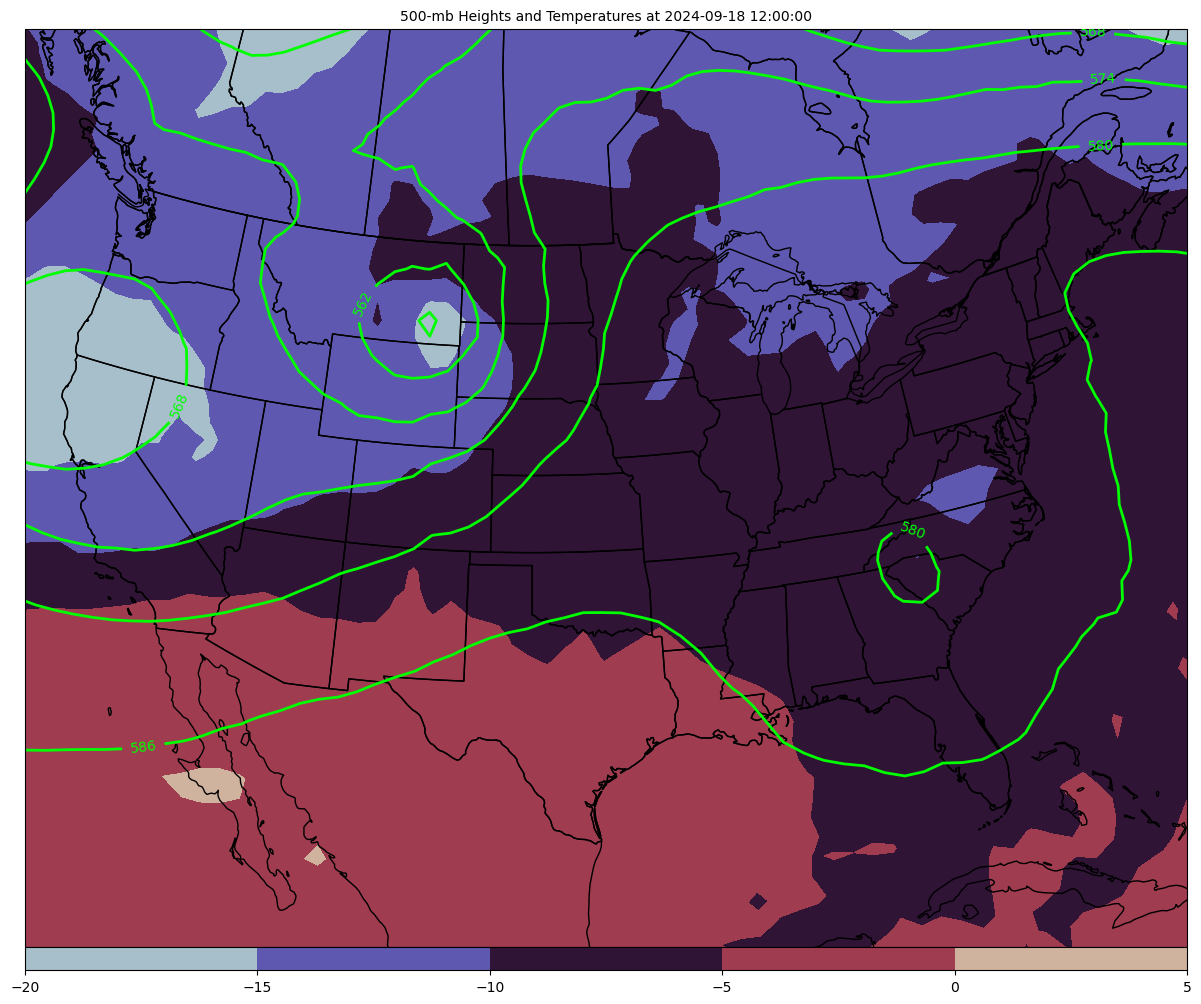

In [14]:
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()

# Example 3: Wind Barbs
This time we will add wind barbs to the plot.

In [15]:
u500 = gem_file.gdxarray(parameter='UREL', date_time=plot_time, level=500)[0]
v500 = gem_file.gdxarray(parameter='VREL', date_time=plot_time, level=500)[0]
u500 = u500 * units('m/s')
v500 = v500 * units('m/s')

In [16]:
wind = xr.merge([u500, v500])
wind

Magnitude,[[[[-6.97528076171875 -8.31528091430664 -8.605280876159668 ... -5.885281085968018 -5.885281085968018 -5.985280990600586] [-5.495281219482422 -6.425281047821045 -6.925281047821045 ... -6.305281162261963 -6.2552809715271 -6.075281143188477] [-5.695281028747559 -4.34528112411499 -4.885281085968018 ... -5.965281009674072 -6.59528112411499 -6.34528112411499] ... [40.29471969604492 39.69471740722656 39.06471633911133 ... 3.0547187328338623 1.8047188520431519 1.954718828201294] [38.76471710205078 39.27471923828125 39.484718322753906 ... 1.0947188138961792 2.7947187423706055 3.9347188472747803] [40.25471878051758 41.59471893310547 42.22471618652344 ... 2.6047186851501465 3.9747188091278076 4.65471887588501]]]]
Units,meter/second
Magnitude,[[[[0.21109400689601898 0.8510940074920654 2.0310940742492676 ... -2.3289058208465576 -2.6489059925079346 -2.938905954360962] [0.7810940146446228 2.561094045639038 2.751093864440918 ... -2.4089059829711914 -2.9089059829711914 -2.998905897140503] [1.311094045639038 4.461093902587891 3.3610939979553223 ... -2.6089060306549072 -3.2589058876037598 -2.8489058017730713] ... [-8.5689058303833 -8.588905334472656 -8.3189058303833 ... 2.571094036102295 4.62109375 -0.528905987739563] [-9.988905906677246 -9.72890567779541 -9.328906059265137 ... 4.631093978881836 3.191093921661377 -0.278905987739563] [-12.078906059265137 -11.668905258178711 -10.938905715942383 ... 2.8010940551757812 0.7410939931869507 -0.16890597343444824]]]]
Units,meter/second


In [17]:
barbs = BarbPlot()
barbs.data = wind
barbs.time = plot_time
barbs.field = ['urel', 'vrel']
barbs.earth_relative = False
barbs.skip = (3, 3)
barbs.plot_units = 'knot'

In [18]:
cp = ContourPlot()
cp.data = ht500
cp.time = plot_time
cp.contours = range(460, 700, 6)
cp.linecolor = 'mediumturquoise'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

In [19]:
panel = MapPanel()
panel.area = [-120, -74, 22, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights and Winds at {plot_time}'
panel.plots = [barbs, cp]

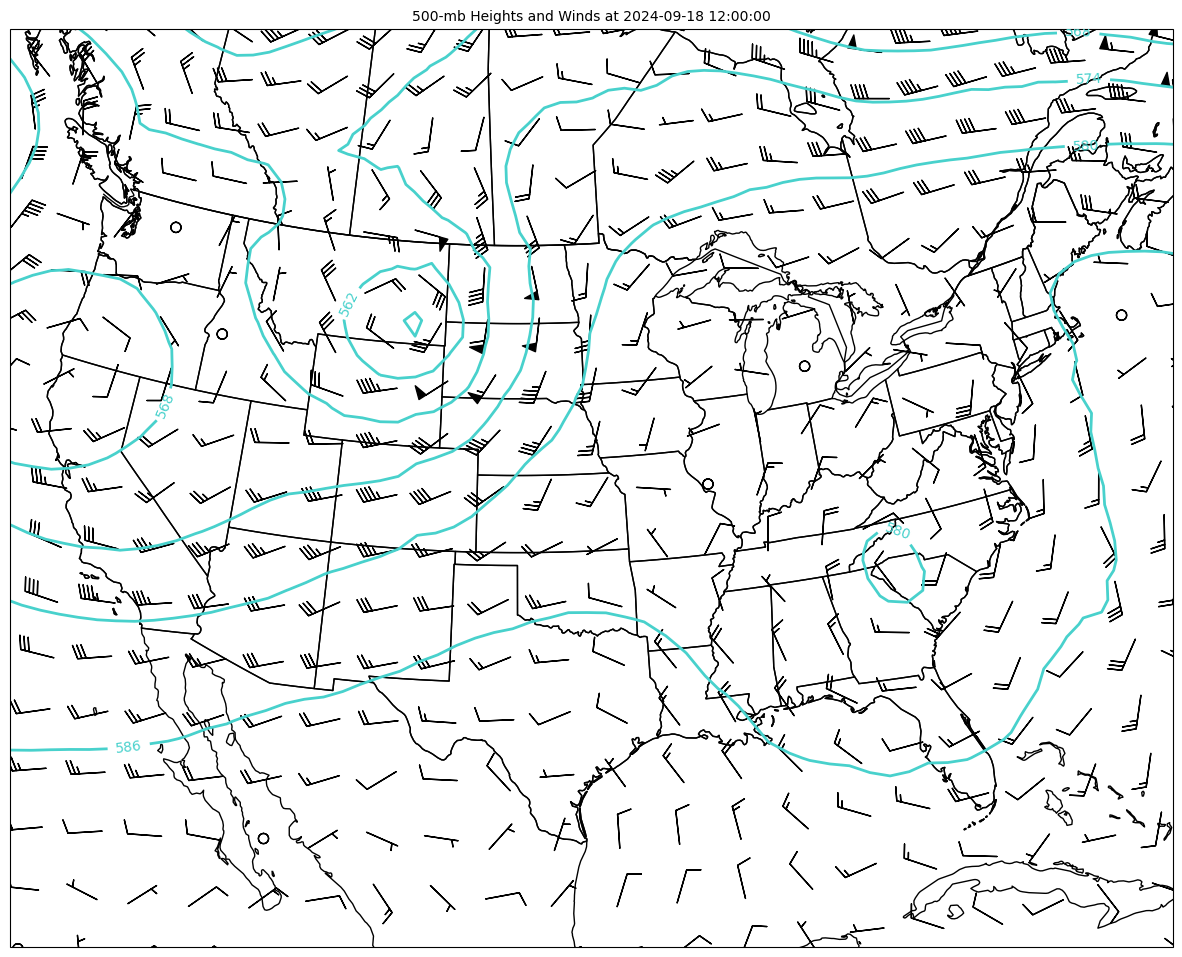

In [20]:
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()